In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/indian_liver_patient.csv")
df.shape

(583, 11)

In [5]:
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1,0.4


In [6]:
df.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

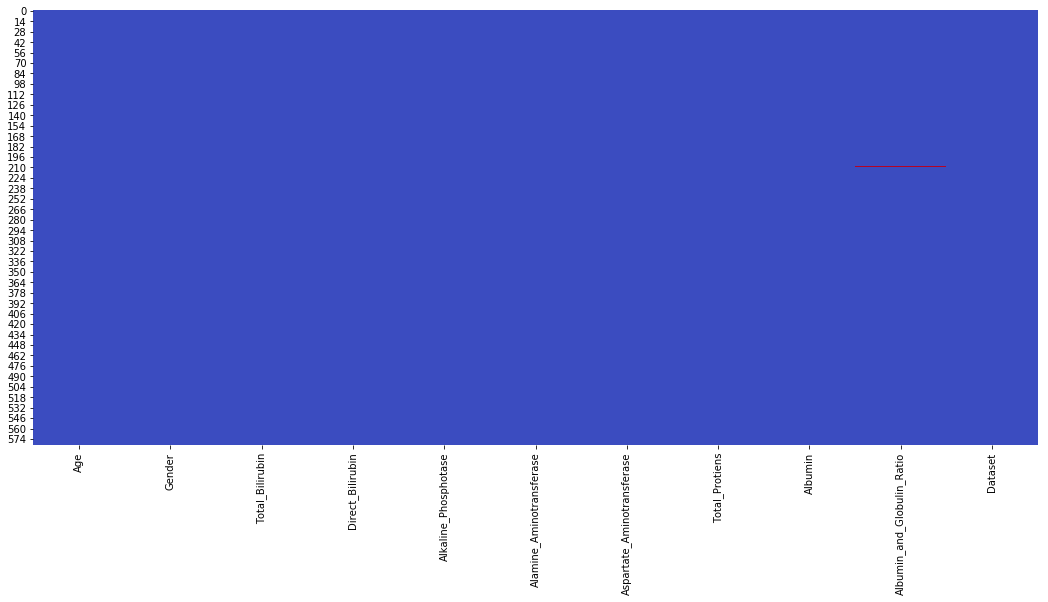

In [9]:
plt.figure(figsize=(18,8))
sns.heatmap(df.isnull(),cmap='coolwarm',cbar = False)

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,583,NaN,NaN,NaN,44.7461,16.1898,4,33,45,58,90
Gender,583,2,Male,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Bilirubin,583,NaN,NaN,NaN,3.2988,6.20952,0.4,0.8,1,2.6,75
Direct_Bilirubin,583,NaN,NaN,NaN,1.48611,2.8085,0.1,0.2,0.3,1.3,19.7
Alkaline_Phosphotase,583,NaN,NaN,NaN,290.576,242.938,63,175.5,208,298,2110
Alamine_Aminotransferase,583,NaN,NaN,NaN,80.7136,182.62,10,23,35,60.5,2000
Aspartate_Aminotransferase,583,NaN,NaN,NaN,109.911,288.919,10,25,42,87,4929
Total_Protiens,583,NaN,NaN,NaN,6.48319,1.08545,2.7,5.8,6.6,7.2,9.6
Albumin,583,NaN,NaN,NaN,3.14185,0.795519,0.9,2.6,3.1,3.8,5.5
Albumin_and_Globulin_Ratio,579,NaN,NaN,NaN,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8


In [12]:
df.groupby(by='Dataset').count().T

Dataset,1,2
Age,416,167
Gender,416,167
Total_Bilirubin,416,167
Direct_Bilirubin,416,167
Alkaline_Phosphotase,416,167
Alamine_Aminotransferase,416,167
Aspartate_Aminotransferase,416,167
Total_Protiens,416,167
Albumin,416,167
Albumin_and_Globulin_Ratio,414,165


In [13]:
np.sum(df.duplicated())

13

In [17]:
def plot(feature_x,Type='Dataset'):
    sns.factorplot(x=Type,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=Type,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=Type,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`;

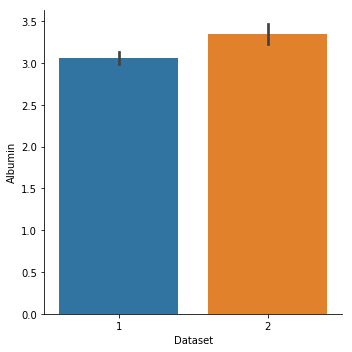

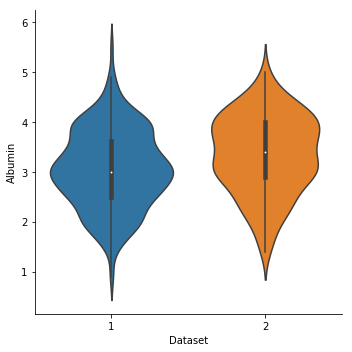

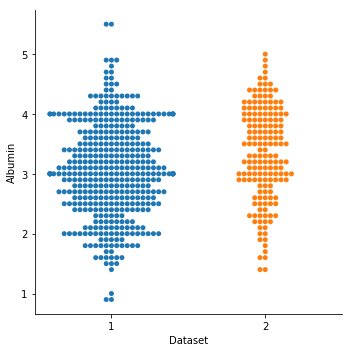

In [18]:
plot('Albumin','Dataset')

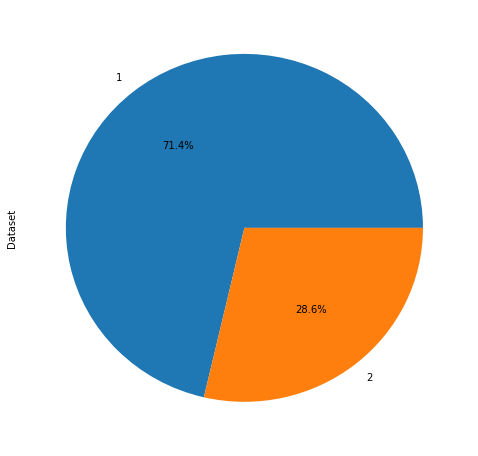

In [19]:
plt.figure(1, figsize=(8,8))
df["Dataset"].value_counts().plot.pie(autopct="%1.1f%%")

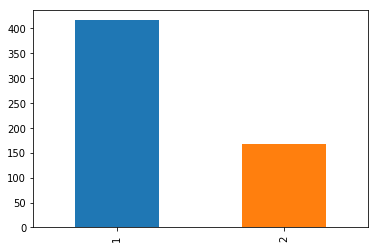

In [21]:
df["Dataset"].value_counts().plot(kind='bar')

In [22]:
df["Dataset"].value_counts(sort=True)

1    416
2    167
Name: Dataset, dtype: int64

In [23]:
df["Dataset"].value_counts()*100/len(df)

1    71.35506
2    28.64494
Name: Dataset, dtype: float64

In [27]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


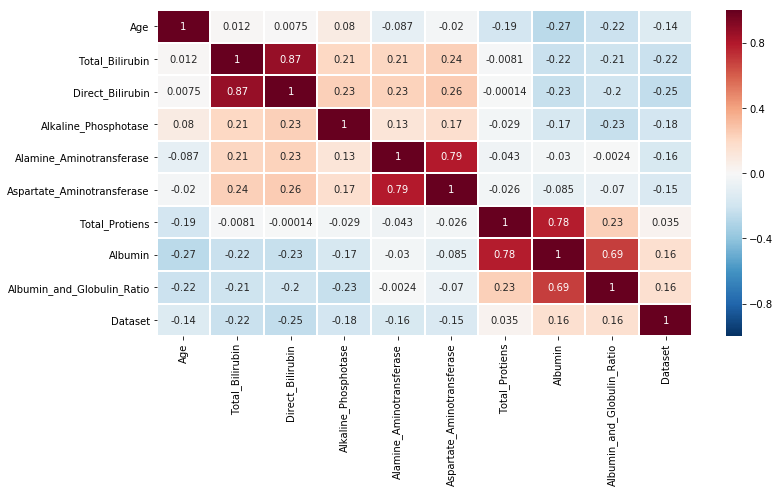

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, linewidths=1,  vmin=-1, cmap="RdBu_r")

In [30]:
correlation = df.corr()
correlation['Dataset'].sort_values(ascending=False)

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.161388
Total_Protiens                0.035008
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64

In [31]:
df.corr()['Dataset'].abs().sort_values(ascending= False)

Dataset                       1.000000
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.161388
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Total_Protiens                0.035008
Name: Dataset, dtype: float64

Text(0.5,1,'Direct_Bilirubin and Class')

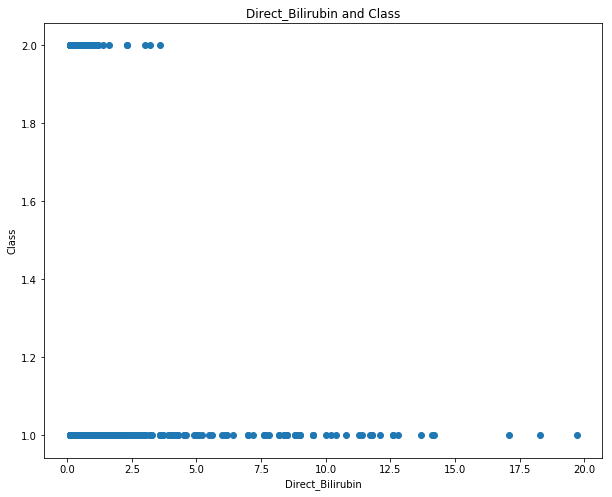

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(df['Direct_Bilirubin'],df['Dataset'])
plt.xlabel('Direct_Bilirubin')             
plt.ylabel('Class')
plt.title('Direct_Bilirubin and Class') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002454C2FB4A8>,
      dtype=object)

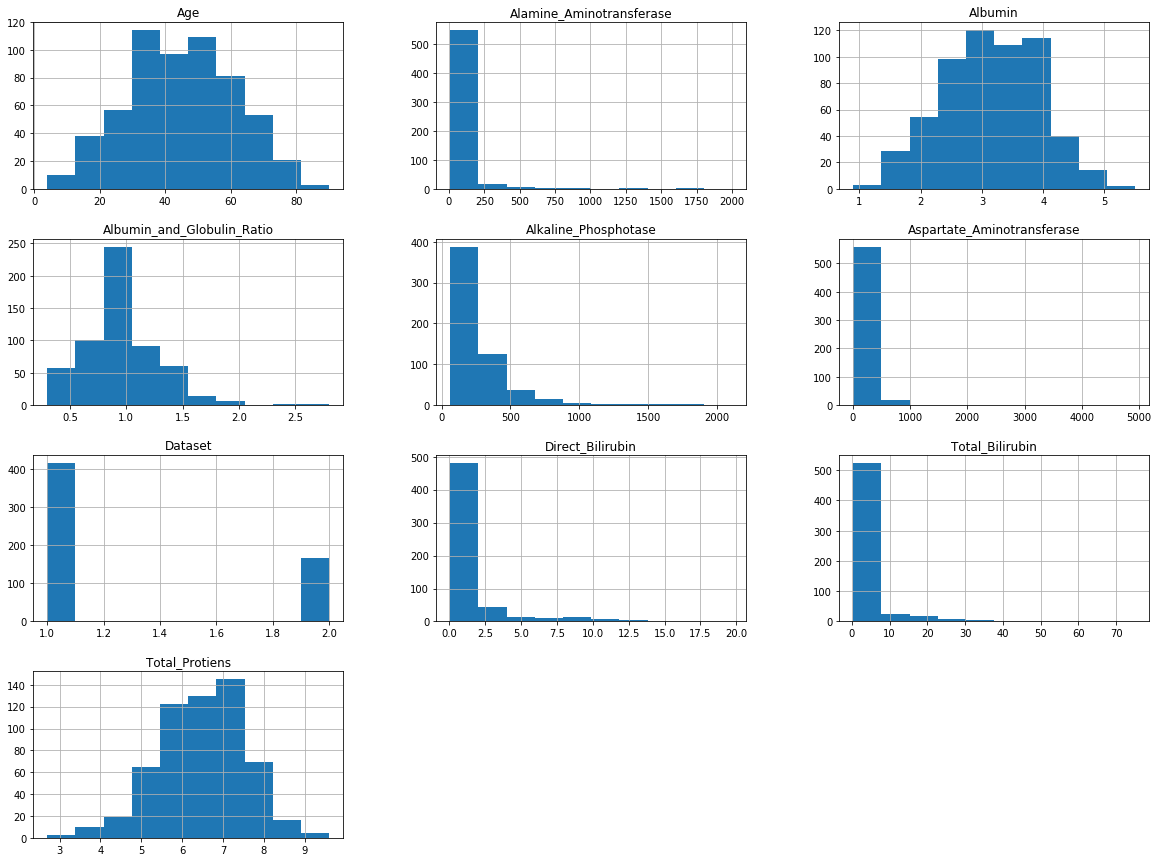

In [34]:
df.hist(figsize=(20,15))

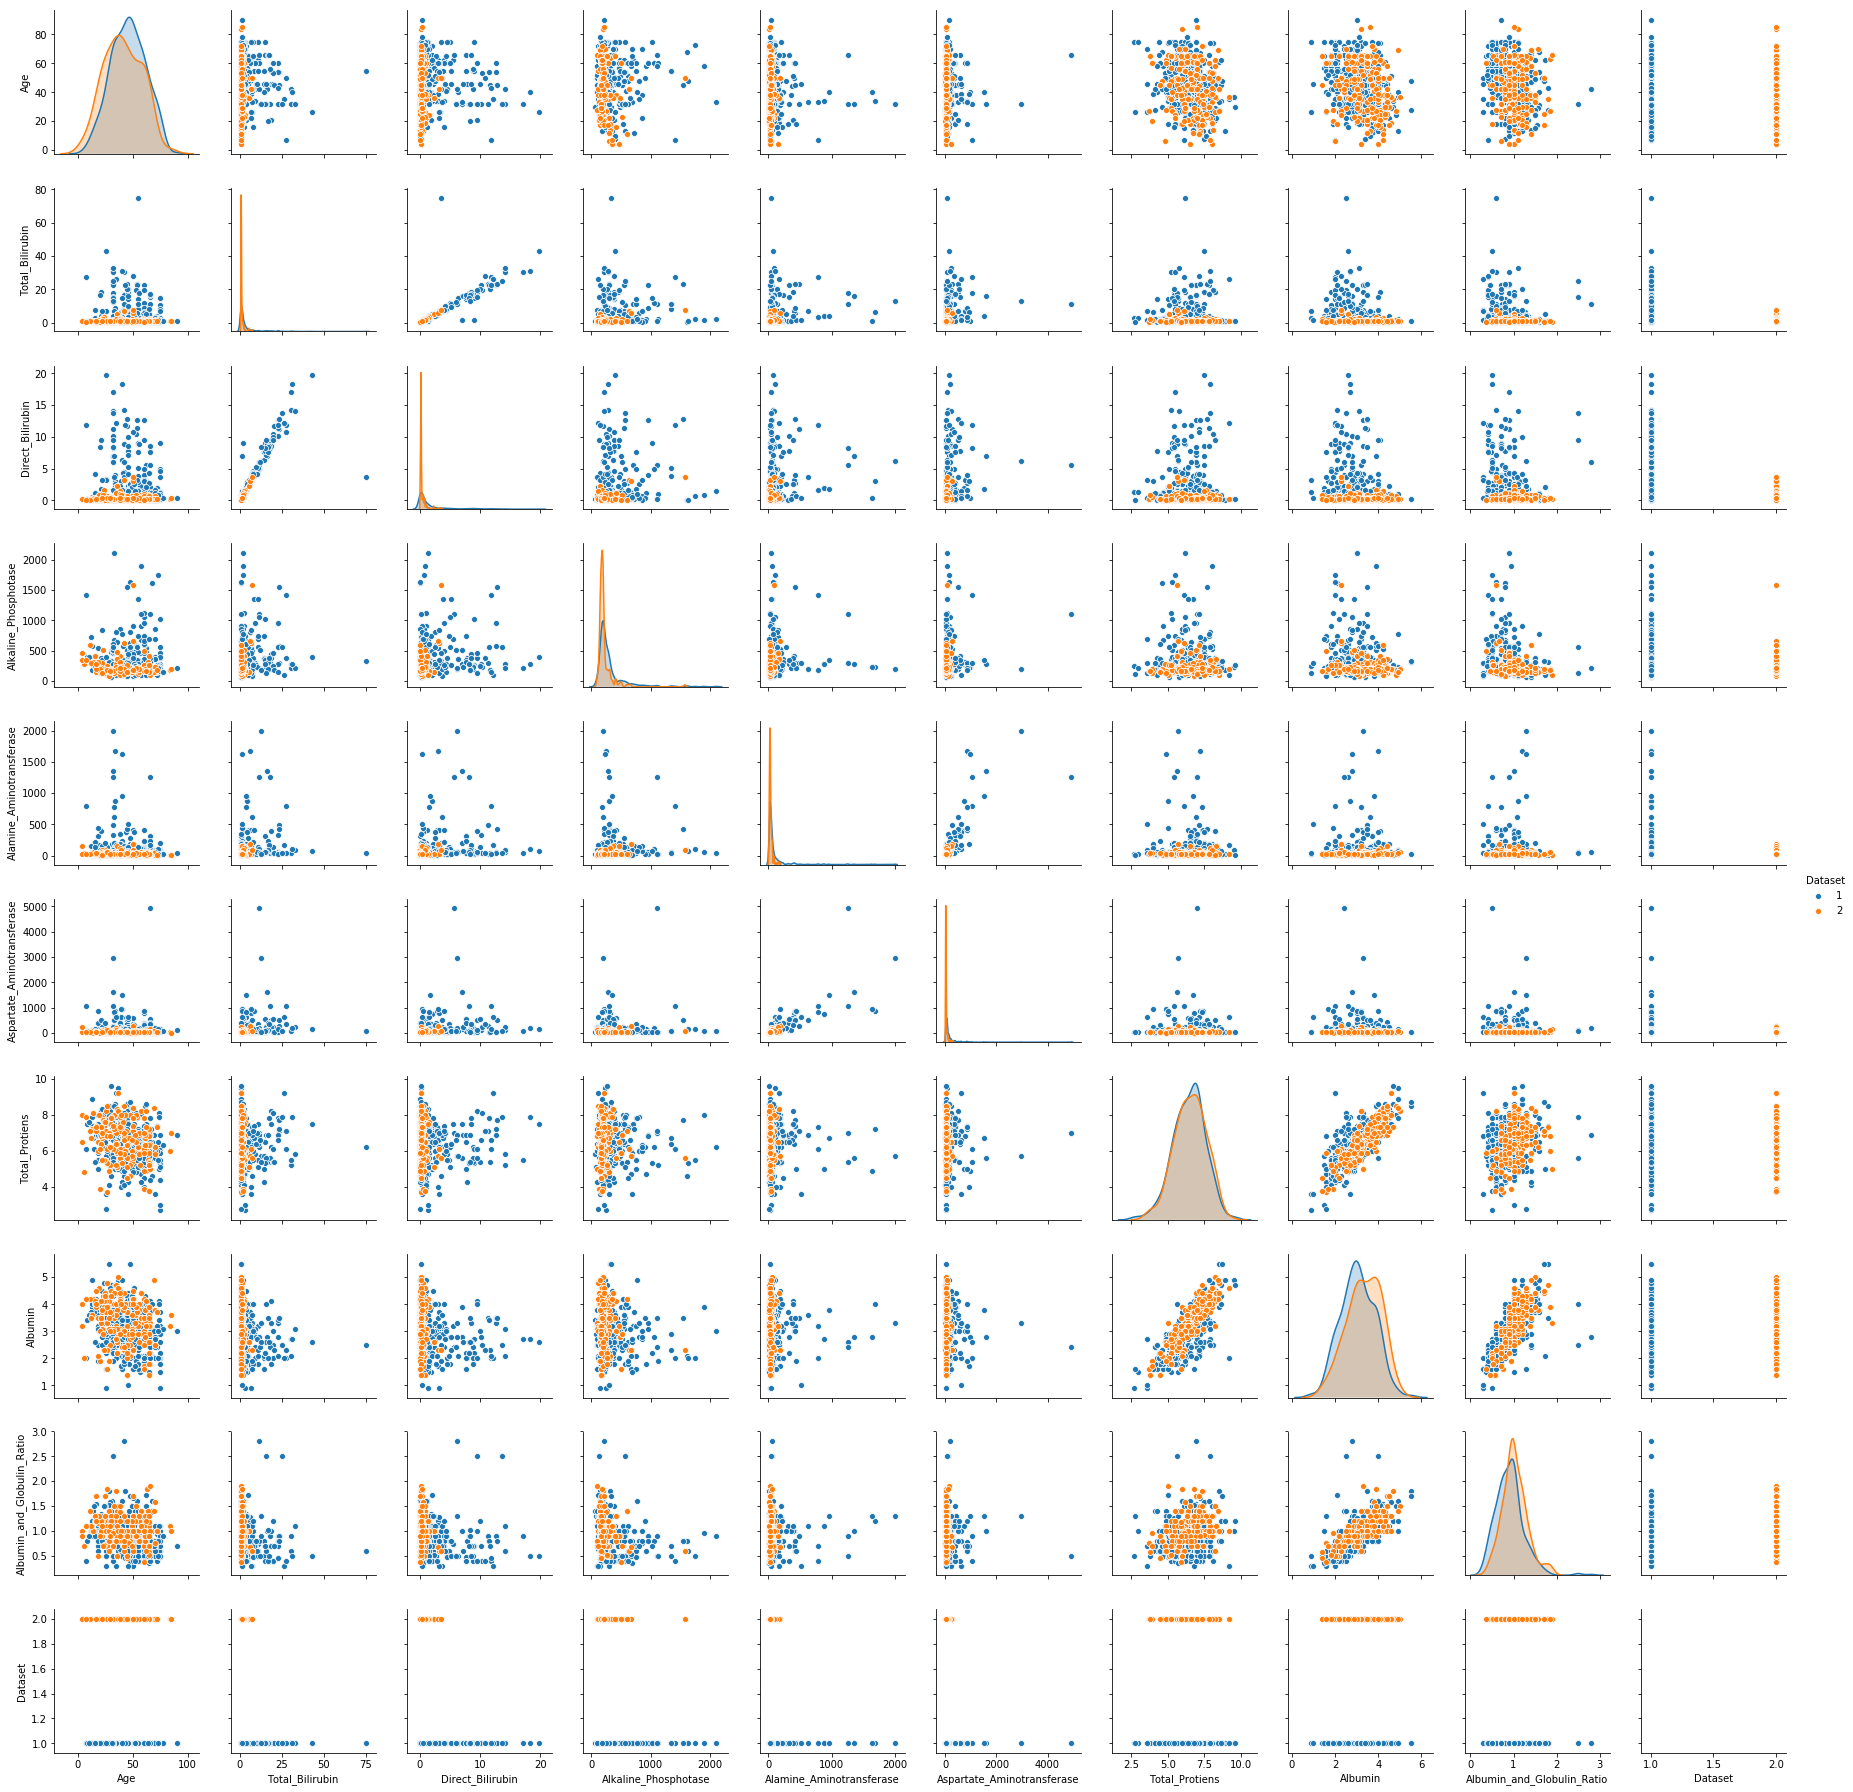

In [35]:
sns.pairplot(df, hue="Dataset",diag_kind="kde")

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


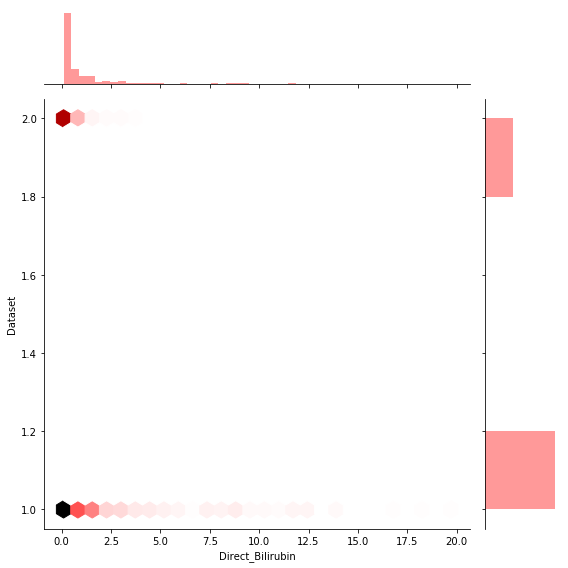

In [36]:
sns.jointplot(x='Direct_Bilirubin', y='Dataset', data=df, kind='hex', color='red', size=8)

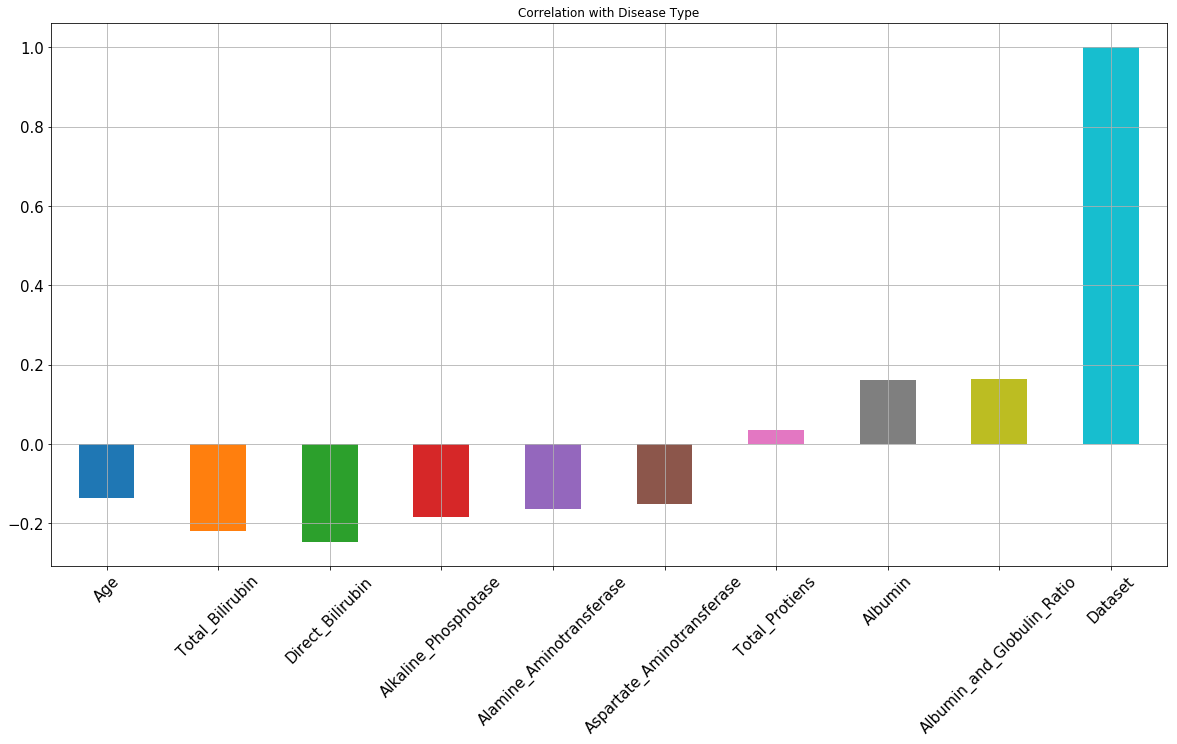

In [39]:
df.corrwith(df.Dataset).plot.bar(
        figsize = (20, 10), title = "Correlation with Disease Type", fontsize = 15, rot = 45, grid = True)

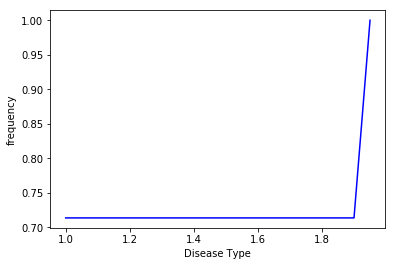

In [40]:
values, base = np.histogram(df['Dataset'], bins=20)
kumulativ = np.cumsum(values/df.shape[0])
plt.plot(base[:-1], kumulativ, c='blue')
plt.xlabel('Disease Type')
plt.ylabel('frequency')
plt.show()

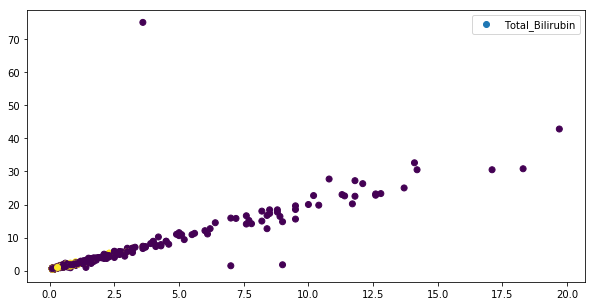

In [41]:
plt.figure(figsize=(10,5))

plt.scatter(x='Direct_Bilirubin', y='Total_Bilirubin', c='Dataset', data=df)
plt.legend()

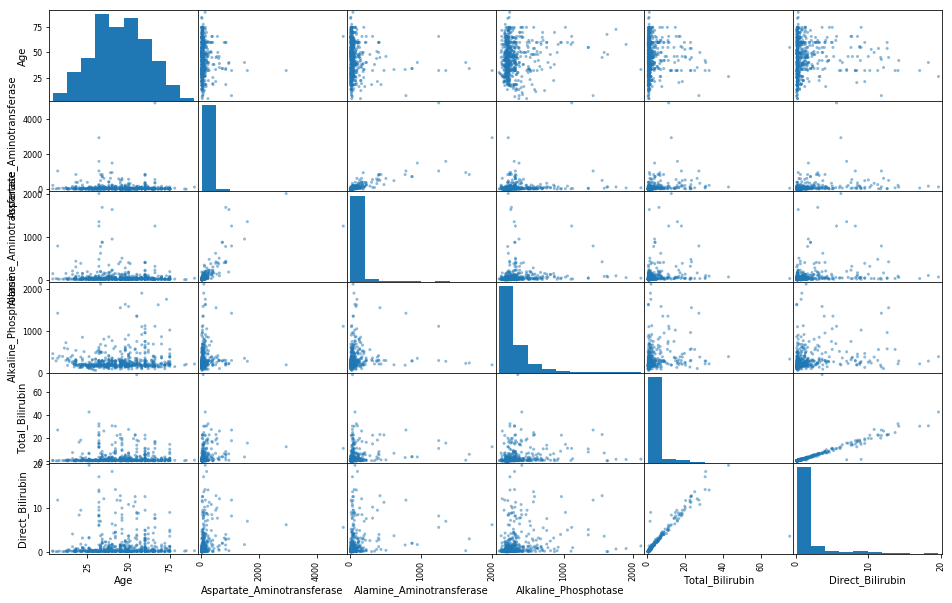

In [42]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Aspartate_Aminotransferase","Alamine_Aminotransferase", "Alkaline_Phosphotase", "Total_Bilirubin", "Direct_Bilirubin",]
scatter_matrix(df[attributes], figsize=(16, 10));

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


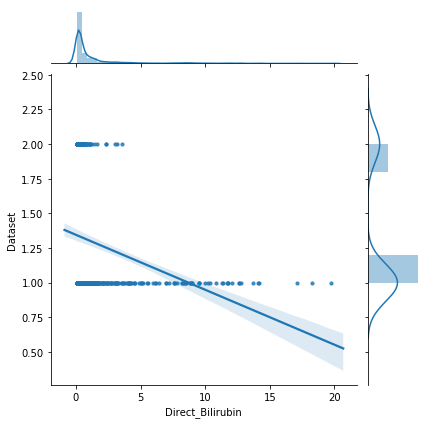

In [45]:
new_df = df[[ "Direct_Bilirubin", "Dataset"]]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Direct_Bilirubin", y="Dataset", data=new_df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

C:\Users\sarak\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


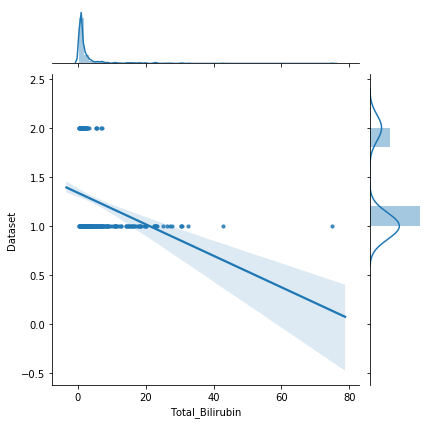

In [46]:
new_df = df[[ "Total_Bilirubin", "Dataset"]]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="Total_Bilirubin", y="Dataset", data=new_df, size=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

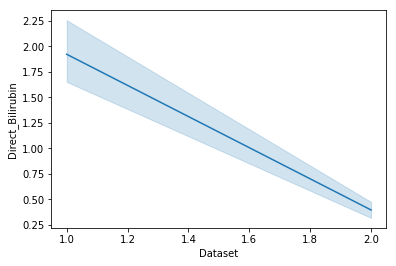

In [48]:
# conda install -c anaconda seaborn=0.9.0
sns.lineplot(x = 'Dataset', y = 'Direct_Bilirubin', data = df)

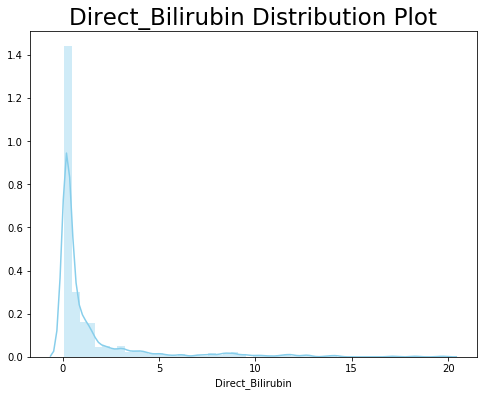

In [51]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Direct_Bilirubin Distribution Plot',fontsize=23)
sns.distplot(df['Direct_Bilirubin'], color='skyblue')

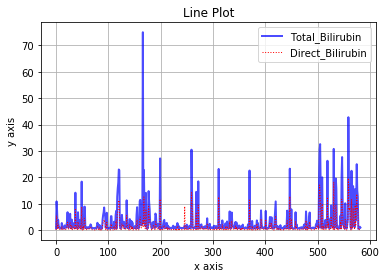

In [53]:
df.Total_Bilirubin.plot(kind="line", color='b' ,label="Total_Bilirubin",linewidth=2 ,alpha=0.7,grid=True,linestyle="-" )
df.Direct_Bilirubin.plot(color='r',label="Direct_Bilirubin", linewidth=1, alpha=1 ,grid=True, linestyle=":")

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()

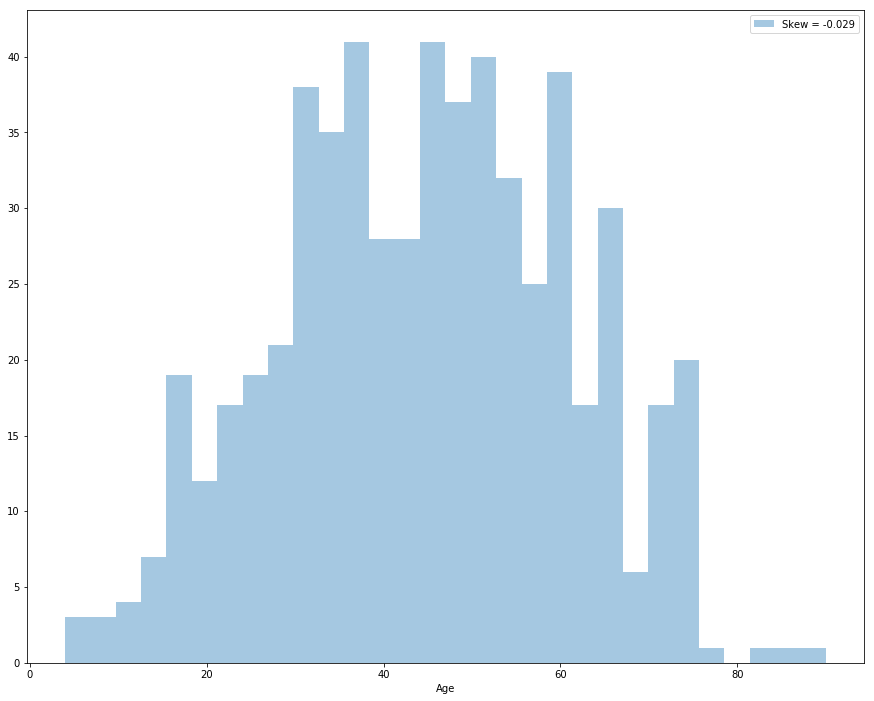

TypeError: could not convert string to float: 'Male'

In [56]:
fig = plt.figure(figsize=(15, 12))

for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

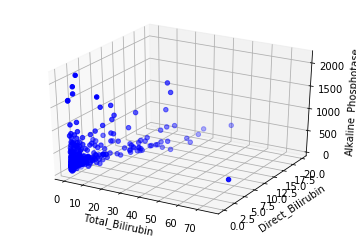

In [64]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for i in range(len(df["Dataset"])+1):
    count = i+1
    train_tempt = df.loc[df['Dataset'] == count]
    x = train_tempt['Total_Bilirubin']
    y = train_tempt['Direct_Bilirubin']
    z = train_tempt['Alkaline_Phosphotase']
    
    ax.scatter(x, y, z, c= [float(i)/float(len(df["Dataset"])), 0.0, 
                            float(len(df["Dataset"])-i)/float(len(df["Dataset"]))], marker='o')
    
    ax.set_xlabel(str('Total_Bilirubin'))
    ax.set_ylabel(str('Direct_Bilirubin'))
    ax.set_zlabel(str('Alkaline_Phosphotase')) 
plt.show()

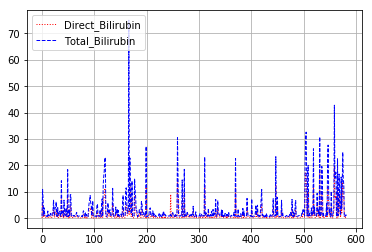

In [66]:
df.Direct_Bilirubin.plot(kind="line",grid=True,color="red",linestyle=":",linewidth=1,label="Direct_Bilirubin")
df.Total_Bilirubin.plot(kind="line",grid=True,color="blue",linestyle="--",linewidth=1,label="Total_Bilirubin")
plt.xlabel=("Samples")
plt.ylabel=("Values")
plt.legend(loc="upper left")
plt.show()

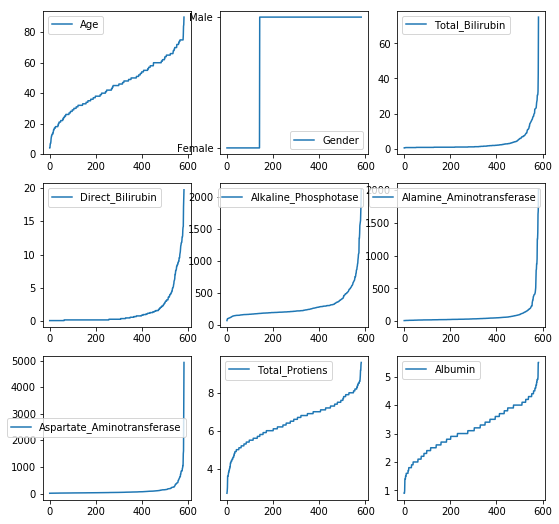

In [67]:
col_names, cn = df.columns, 0
fig, ax = plt.subplots(3, 3, figsize=(9,9))
for row in ax:
    for cell in row:
        sv = df[col_names[cn]].sort_values().tolist()
        cell.plot(sv, label=col_names[cn])
        cell.legend()
        cn+=1